Import Library

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage import io, morphology, measure, segmentation, filters
from skimage.filters import gaussian
from skimage.segmentation import active_contour 
from scipy.ndimage import distance_transform_edt

Show Original Image

In [2]:
# Load image
# Baca citra dalam format BGR (default OpenCV)
image = cv2.imread('./image/image1.jpg')

# Tampilkan citra Original (RGB)
cv2.imshow('Image Original', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plt.imshow(image)
# plt.colorbar()

Convert to HSV

In [3]:
#load original citra
image_bgr = cv2.imread('./image/image1.jpg')

# Konversi citra ke format HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Simpan citra HSV
cv2.imwrite('./image/hsv/image1_hsv.jpg', image_hsv)

# Tampilkan citra HSV
cv2.imshow('HSV Image', image_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

Using Threshold in HSV

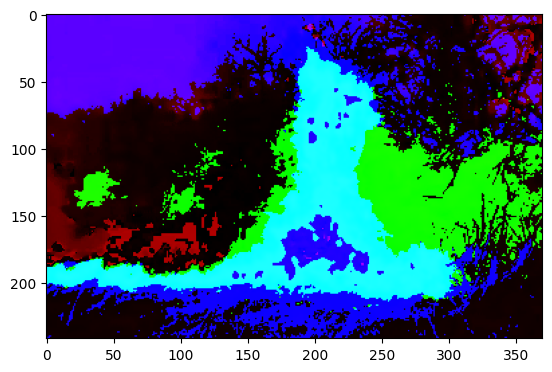

In [4]:
# Ambil channel H, S, V dari citra HSV
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# Threshold pada channel V menggunakan nilai threshold min dan max
# threshold_min = 130
# threshold_min = 143 (yang ini)
threshold_min_v = 123
threshold_max_v = 255

_v, v_thresh = cv2.threshold(v_channel, threshold_min_v, threshold_max_v, cv2.THRESH_BINARY)

threshold_min_s = 123
threshold_max_s = 255
_s, s_thresh = cv2.threshold(s_channel, threshold_min_s, threshold_max_s, cv2.THRESH_BINARY)

# threshold_min_h = 255
# threshold_max_h = 255
# _h, h_thresh = cv2.threshold(s_channel, threshold_min_h, threshold_max_h, cv2.THRESH_BINARY)

# Gabungkan kembali channel H, S, dan channel V yang telah di-threshold
thresholded_image = cv2.merge((h_channel, s_thresh, v_thresh))

# Simpan citra HSV Threshold
cv2.imwrite('./image/hsv/image1_hsv_threshold.jpg', thresholded_image)

# Tampilkan citra hasil thresholding
cv2.imshow('Thresholded Image', thresholded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(thresholded_image)
plt.show()

Convert Citra to Grayscale

In [28]:
def hsv_to_grayscale(hsv_image):
    # Ambil komponen Hue, Saturation, dan Value dari citra HSV
    hue, saturation, value = cv2.split(hsv_image)
    
    # Hitung nilai rata-rata dari komponen Hue, Saturation, dan Value
    grayscale_image = np.mean([hue, saturation, value], axis=0).astype(np.uint8)
    
    return grayscale_image

# Baca citra HSV
hsv_image = cv2.imread('./image/hsv/image1_hsv_threshold.jpg', cv2.IMREAD_COLOR)

# Konversi citra dari format HSV ke grayscale
grayscale_image = hsv_to_grayscale(hsv_image)

# Simpan citra grayscale
cv2.imwrite('./image/grayscale/image1_grayscale.jpg', grayscale_image)

# Tampilkan citra grayscale
cv2.imshow('Grayscale Image', grayscale_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Using Threshold in Grayscale

In [67]:
def apply_threshold(image, threshold_value):
    # Lakukan thresholding menggunakan metode Binary
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    return thresholded_image

# Baca citra grayscale
grayscale_image = cv2.imread('./image/grayscale/image1_grayscale.jpg', cv2.IMREAD_GRAYSCALE)

# Tentukan nilai threshold
# threshold_value = 143
threshold_value = 163

# Terapkan thresholding pada citra grayscale
thresholded_image = apply_threshold(grayscale_image, threshold_value)
# combined = thresholded_image

# menghulangkan noise yang ada pada citra walaupun sudah dilakukan threshold
filtered_image = cv2.medianBlur(thresholded_image, 3)
combined = filtered_image

# Simpan citra hasil thresholding
cv2.imwrite('./image/grayscale/image1_grayscale_thresholding.jpg', filtered_image)

# Tampilkan citra hasil thresholding
cv2.imshow('Thresholded Image', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# ## Read
# img = cv2.imread("./image/image1.jpg")

# ## convert to hsv
# hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# ## mask of green (36,0,0) ~ (70, 255,255)
# mask1 = cv2.inRange(hsv, (36, 0, 0), (70, 255,255))

# ## mask o yellow (15,0,0) ~ (36, 255, 255)
# mask2 = cv2.inRange(hsv, (15,0,0), (36, 255, 255))

# ## final mask and masked
# mask = cv2.bitwise_or(mask1, mask2)
# target = cv2.bitwise_and(img,img, mask=mask)

# cv2.imwrite("./image/target.png", target)
# plt.imshow(target)

In [8]:
# # Plot the image
# def imshow(img, ax=None):
#     if ax is None:
#         ret, encoded = cv2.imencode(".jpg", img)
#         display(Image(encoded))
#     else:
#         ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#         ax.axis('off')
  
# #Image loading
# img = cv2.imread("./image/target.png")
  
# #image grayscale conversion
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # Show image
# imshow(gray)
# # plt.imsave('./image/imageplt.jpg' ,img)

Contour image

In [68]:
# # Load citra sebaran api
image = cv2.imread('./image/grayscale/image1_grayscale_thresholding.jpg')

# Konversi citra ke citra biner (grayscale dengan tipe data CV_8UC1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

# Temukan kontur pada citra biner
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada citra asli
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# # Draw contours on the mask image
# cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Tampilkan citra dengan kontur
cv2.imshow('Fire Contour', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# # Load citra sebaran api
# image = cv2.imread('./image/image1.jpg')

# ## convert to hsv
# hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# # # Tentukan rentang warna sebaran api dalam format HSV
# lower_fire = np.array([23, 100, 100])
# upper_fire = np.array([30, 255, 255])

# # Buat mask menggunakan inRange
# mask = cv2.inRange(hsv, lower_fire, upper_fire)

# # Temukan kontur pada citra hasil operasi morfologi
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Gambar kontur pada citra asli
# cv2.drawContours(image, contours, -1, (0, 255, 0), 1)

# # Tampilkan citra dengan kontur
# cv2.imshow('Fire Contour', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Morphologi terbuka

In [69]:
# Define the structuring element for morphological operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))

# Perform morphological opening
# opened = cv2.morphologyEx(combined, cv2.MORPH_OPEN, kernel)
opened = cv2.morphologyEx(combined, cv2.MORPH_OPEN, kernel, iterations=2)

# Tampilkan citra hasil operasi morfologi terbuka
# cv2.imwrite('image_morphology.png', opened)
cv2.imshow('Opened Image', opened)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
# # Perform distance transform
# distance_transform = distance_transform_edt(binary)

# # Normalize the distance transform
# normalized_distance = distance_transform / distance_transform.max()

# plt.imshow(normalized_distance)
# plt.title('Opened Image')
# plt.show()

In [13]:
# sure_bg = cv2.dilate(opened, kernel, iterations=5)
# plt.imshow(sure_bg, 'gray')

# # yang hitam sudah pasti background

In [14]:
# # sudah pasti objeknya (fore ground) yang berwarna putih menggunakan operasi erosi
# sure_fg = cv2.erode(opened, kernel, iterations=9)
# plt.imshow(sure_fg, 'gray')

# dist_transform = cv2.distanceTransform(opened, cv2.DIST_L2, 5)
# plt.imshow(dist_transform, 'gray')
# ret, sure_fg = cv2.threshold(dist_transform, 0.01*dist_transform.max(), 255, 0)
# plt.imshow(sure_fg, 'gray')
# sure_fg = np.uint8(sure_fg)

In [15]:
# # mengetahui area yang bukan foreground dan bukan background
# unknown = cv2.subtract(sure_bg, sure_fg)
# plt.imshow(unknown, 'gray')

In [16]:
# # buat marker
# ret3, markers = cv2.connectedComponents(sure_fg)
# plt.imshow(markers, 'gray')

In [17]:
# # ditandai yang background berwarna hitam
# markers = markers + 10
# markers[unknown == 255] = 0
# plt.imshow(markers, 'gray')

In [18]:
# # lakukan watershed
# markers = cv2.watershed(image, markers)

Transformasi Jarak

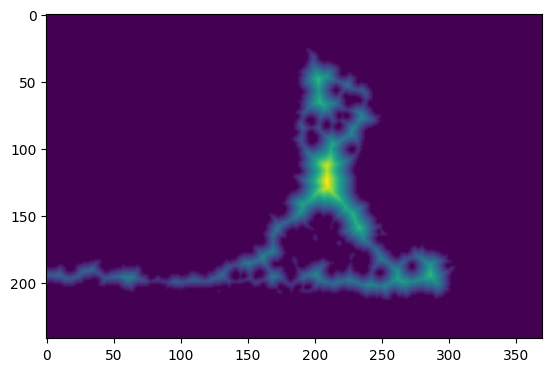

In [79]:
# Dapatkan transformasi jarak dari citra hasil morfologi terbuka
dist_transform = cv2.distanceTransform(opened, cv2.DIST_L2, 3)

# Normalisasi transformasi jarak untuk tampilan yang lebih baik
dist_transform = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

ret, sure_fg = cv2.threshold(dist_transform, 0.01*dist_transform.max(), 255,0 )
plt.imshow(dist_transform)

# # Tampilkan citra transformasi jarak
# cv2.imwrite('image_transformasi_jarak.png', dist_transform)
# cv2.imshow('Distance Transform', dist_transform)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# sure_fg = np.uint8(sure_fg)

# # Dapatkan area yang tidak termasuk dalam area objek menggunakan operasi pengurangan (dapatkan area background)
sure_bg = cv2.subtract(opened, sure_fg.astype(np.uint8))

# plt.imshow(sure_bg)

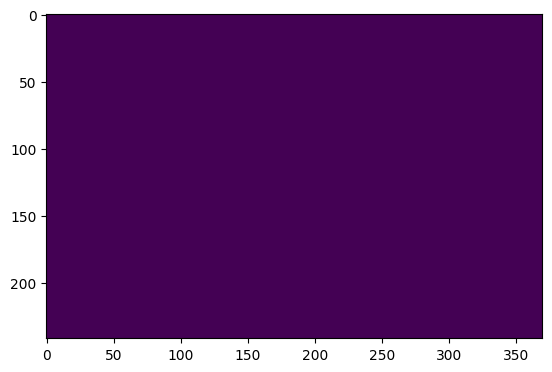

In [80]:
# mengambil background dari citra

unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown)

Transformasi jarak versi 2

In [21]:
# # Create subplots with 1 row and 2 columns
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# # sure background area
# sure_bg = cv2.dilate(combined, kernel, iterations=3)
# imshow(sure_bg, axes[0,0])
# axes[0, 0].set_title('Sure Background')

# # Distance transform
# dist = cv2.distanceTransform(combined, cv2.DIST_L2, 5)
# imshow(dist, axes[0,1])
# axes[0, 1].set_title('Distance Transform')

# #foreground area
# ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
# sure_fg = sure_fg.astype(np.uint8)
# imshow(sure_fg, axes[1,0])
# axes[1, 0].set_title('Sure Foreground')

# # unknown area
# unknown = cv2.subtract(sure_bg, sure_fg)
# imshow(unknown, axes[1,1])
# axes[1, 1].set_title('Unknown')

# plt.show()

Marker 

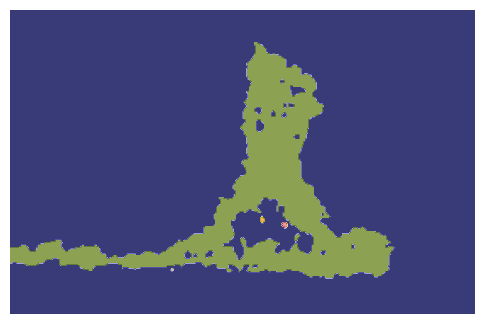

In [85]:
# Marker labelling
# sure foreground 
ret, markers = cv2.connectedComponents(sure_fg)
  
# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0
  
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

Text(0.5, 1.0, 'Segmented Image')

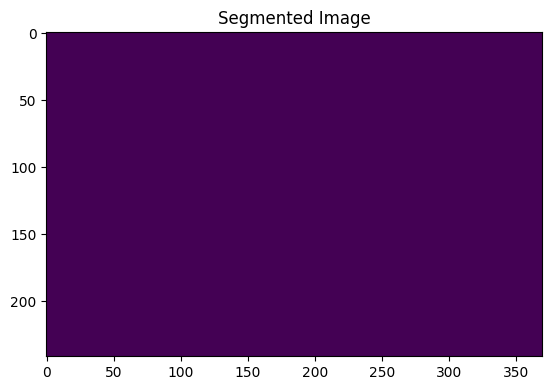

In [73]:
markers, num_markers = measure.label(sure_bg, return_num=True)

# Perform watershed segmentation
labels = segmentation.watershed(dist_transform, markers)

plt.imshow(labels)
plt.title('Segmented Image')

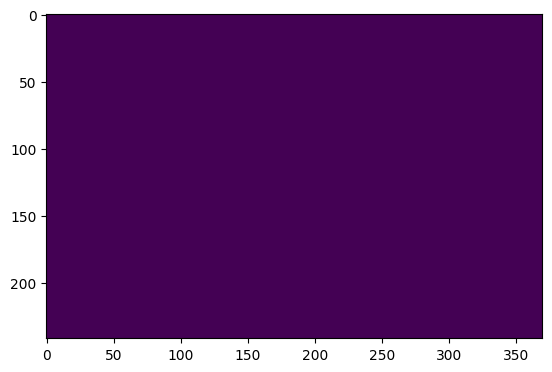

In [74]:
markers = markers + 10
markers[unknown == 255] = 0
plt.imshow(markers)

In [75]:
img = cv2.imread('./image/image1.jpg')
markers = cv2.watershed(img, markers)
plt.imshow(markers)

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'watershed'
> Overload resolution failed:
>  - Layout of the output array markers is incompatible with cv::Mat
>  - Expected Ptr<cv::UMat> for argument 'markers'


In [76]:
print(markers)

[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]


In [ ]:
# img[markers == -1] = [255,0,0]
# plt.imshow(img)

Segmentasi Watershed

In [ ]:
# # Terapkan segmentasi Watershed
# ret, markers = cv2.connectedComponents(dist_transform)

# # Tandai kontur pada citra asli dengan warna biru
# image_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# # image_rgb[markers == -1] = [0, 0, 255]

# # # Tampilkan citra hasil segmentasi Watershed
# # cv2.imshow('Segmented Image', image_rgb)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()